<a href="https://colab.research.google.com/github/Keya1006/CodeAlpha_Data-Science/blob/main/unemployement_rate_prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv
Saving Unemployment in India.csv to Unemployment in India.csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [2]:
from google.colab import files
uploaded = files.upload()



Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv
Saving Unemployment in India.csv to Unemployment in India (1).csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (1).csv


In [3]:
import pandas as pd

df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print("Original Columns:\n", df.columns)


Original Columns:
 Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [4]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


✅ Mean Squared Error: 38.24
✅ R² Score: 0.59


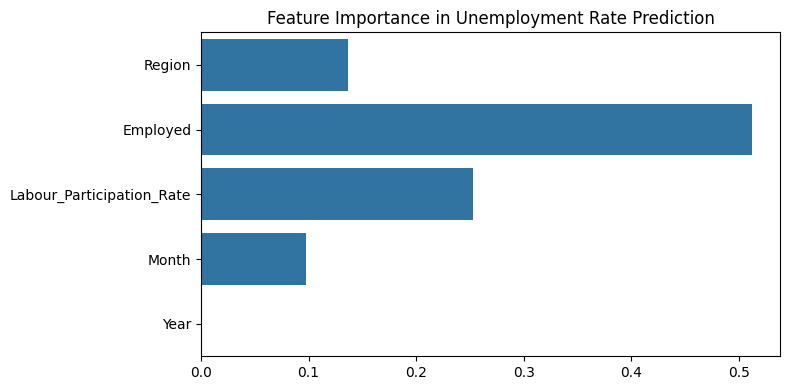

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Drop irrelevant columns
df = df.drop(['Region.1', 'longitude', 'latitude'], axis=1)

# Rename important columns
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode 'Region'
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Define features and target
features = ['Region', 'Employed', 'Labour_Participation_Rate', 'Month', 'Year']
target = 'Unemployment_Rate'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Mean Squared Error:", round(mse, 2))
print("✅ R² Score:", round(r2, 2))

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance in Unemployment Rate Prediction")
plt.tight_layout()
plt.show()


In [6]:
# Define your custom input
input_data = {
    'Region': 'Tamil Nadu',
    'Employed': 28000000,
    'Labour_Participation_Rate': 41.25,
    'Month': 8,
    'Year': 2020
}

# Encode the region using the same label encoder
region_encoded = le.transform([input_data['Region']])[0]

# Create DataFrame for model input
input_df = pd.DataFrame([[
    region_encoded,
    input_data['Employed'],
    input_data['Labour_Participation_Rate'],
    input_data['Month'],
    input_data['Year']
]], columns=features)

# Make prediction
predicted_rate = model.predict(input_df)[0]
print(f"🔮 Predicted Unemployment Rate for {input_data['Region']} in {input_data['Month']}/{input_data['Year']}: {predicted_rate:.2f}%")


🔮 Predicted Unemployment Rate for Tamil Nadu in 8/2020: 6.14%


In [7]:
print(le.classes_)


['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


✅ Model Evaluation
Mean Squared Error: 38.24
R² Score: 0.59


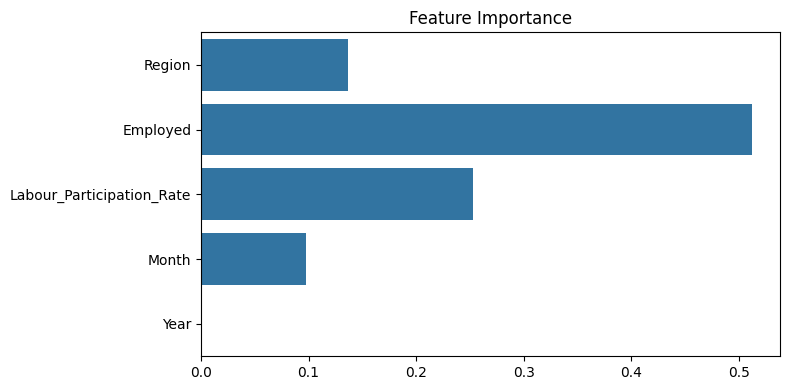


✅ Trained model and encoder saved as:
 - unemployment_predictor_model.pkl
 - region_label_encoder.pkl


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving model

# Load and clean dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Drop irrelevant columns
df = df.drop(['Region.1', 'longitude', 'latitude'], axis=1)

# Rename for consistency
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

# Convert Date to datetime and extract time components
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode categorical column: Region
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Define features and target
features = ['Region', 'Employed', 'Labour_Participation_Rate', 'Month', 'Year']
target = 'Unemployment_Rate'
X = df[features]
y = df[target]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation")
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

# Feature importance plot
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# 🔒 Save trained model and label encoder
joblib.dump(model, 'unemployment_predictor_model.pkl')
joblib.dump(le, 'region_label_encoder.pkl')

print("\n✅ Trained model and encoder saved as:")
print(" - unemployment_predictor_model.pkl")
print(" - region_label_encoder.pkl")


In [9]:
import joblib
import pandas as pd

# Load model and encoder
model = joblib.load("unemployment_predictor_model.pkl")
le = joblib.load("region_label_encoder.pkl")

# Prepare input
input_data = {
    'Region': 'Tamil Nadu',
    'Employed': 28000000,
    'Labour_Participation_Rate': 41.25,
    'Month': 8,
    'Year': 2020
}

# Encode and predict
region_encoded = le.transform([input_data['Region']])[0]
input_df = pd.DataFrame([[
    region_encoded,
    input_data['Employed'],
    input_data['Labour_Participation_Rate'],
    input_data['Month'],
    input_data['Year']
]], columns=['Region', 'Employed', 'Labour_Participation_Rate', 'Month', 'Year'])

predicted_rate = model.predict(input_df)[0]
print(f"🔮 Predicted Unemployment Rate: {predicted_rate:.2f}%")


🔮 Predicted Unemployment Rate: 6.14%


✅ Advanced Model Evaluation:
Mean Squared Error: 57.348
R² Score: 0.39


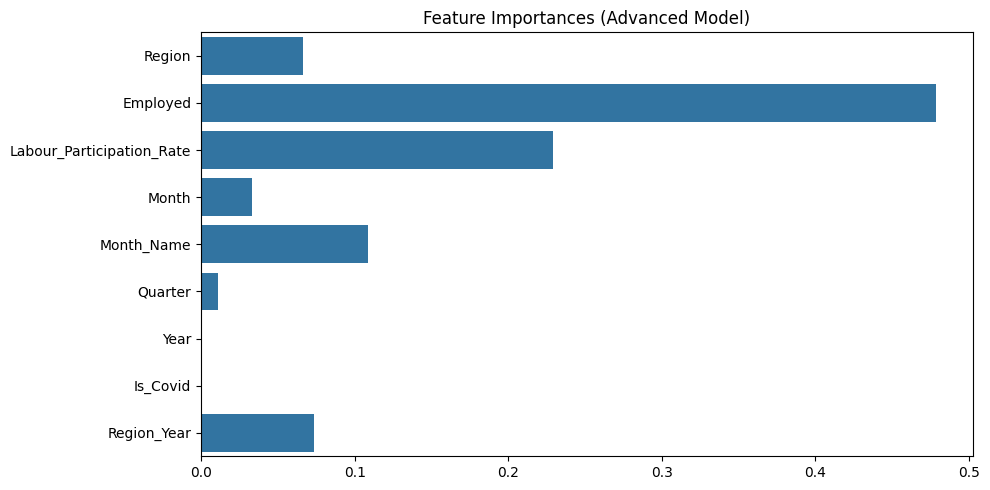


✅ Saved files:
- unemployment_advanced_model.pkl
- region_encoder.pkl
- region_year_encoder.pkl
- month_name_encoder.pkl


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.columns = df.columns.str.strip()

# Drop unused columns
df.drop(['Region.1', 'longitude', 'latitude'], axis=1, inplace=True)

# Rename for ease
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Date processing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

['Is_Covid'] = df['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)


df['Region_Year'] = df['Region'] + "_" + df['Year'].astype(str)


le_region_year = LabelEncoder()
df['Region_Year'] = le_region_year.fit_transform(df['Region_Year'])

le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])

le_month_name = LabelEncoder()
df['Month_Name'] = le_month_name.fit_transform(df['Month_Name'])

features = [
    'Region', 'Employed', 'Labour_Participation_Rate',
    'Month', 'Month_Name', 'Quarter', 'Year', 'Is_Covid', 'Region_Year'
]
target = 'Unemployment_Rate'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Advanced Model Evaluation:")
print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))


plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importances (Advanced Model)")
plt.tight_layout()
plt.show()


joblib.dump(model, 'unemployment_advanced_model.pkl')
joblib.dump(le_region, 'region_encoder.pkl')
joblib.dump(le_region_year, 'region_year_encoder.pkl')
joblib.dump(le_month_name, 'month_name_encoder.pkl')

print("\n✅ Saved files:")
print("- unemployment_advanced_model.pkl")
print("- region_encoder.pkl")
print("- region_year_encoder.pkl")
print("- month_name_encoder.pkl")


In [11]:
import pandas as pd
import joblib


In [12]:

model = joblib.load('unemployment_advanced_model.pkl')
region_encoder = joblib.load('region_encoder.pkl')
region_year_encoder = joblib.load('region_year_encoder.pkl')
month_name_encoder = joblib.load('month_name_encoder.pkl')


In [13]:

input_data = {
    'Region': 'Tamil Nadu',
    'Employed': 28000000,
    'Labour_Participation_Rate': 41.25,
    'Month': 8,
    'Month_Name': 'August',
    'Quarter': 3,
    'Year': 2020,
    'Is_Covid': 1
}


input_data['Region'] = region_encoder.transform([input_data['Region']])[0]
input_data['Month_Name'] = month_name_encoder.transform([input_data['Month_Name']])[0]
input_data['Region_Year'] = region_year_encoder.transform(
    [f"{region_encoder.inverse_transform([input_data['Region']])[0]}_{input_data['Year']}"]
)[0]


In [14]:

input_df = pd.DataFrame([[
    input_data['Region'],
    input_data['Employed'],
    input_data['Labour_Participation_Rate'],
    input_data['Month'],
    input_data['Month_Name'],
    input_data['Quarter'],
    input_data['Year'],
    input_data['Is_Covid'],
    input_data['Region_Year']
]], columns=[
    'Region', 'Employed', 'Labour_Participation_Rate',
    'Month', 'Month_Name', 'Quarter', 'Year', 'Is_Covid', 'Region_Year'
])


prediction = model.predict(input_df)[0]
print(f"🔮 Predicted Unemployment Rate: {prediction:.2f}%")


🔮 Predicted Unemployment Rate: 6.27%


In [15]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (2).csv


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.columns = df.columns.str.strip()  # Remove whitespace from column names


df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()


In [17]:
df['Covid'] = df['Year'].apply(lambda x: 'During COVID' if x >= 2020 else 'Pre-COVID')


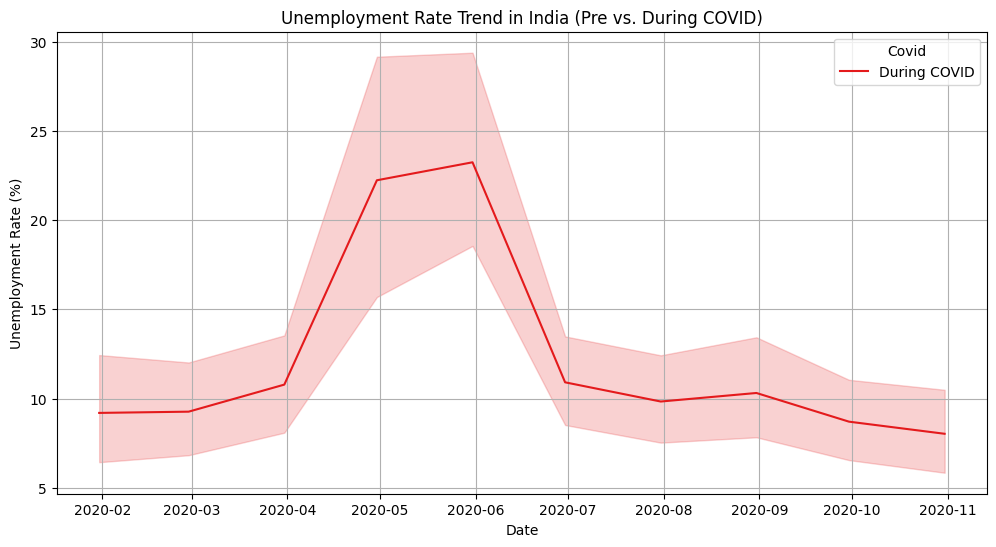

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Covid', palette='Set1')
plt.title("Unemployment Rate Trend in India (Pre vs. During COVID)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


<ipython-input-19-266a3854c3f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Covid', y='Unemployment_Rate', palette='coolwarm')


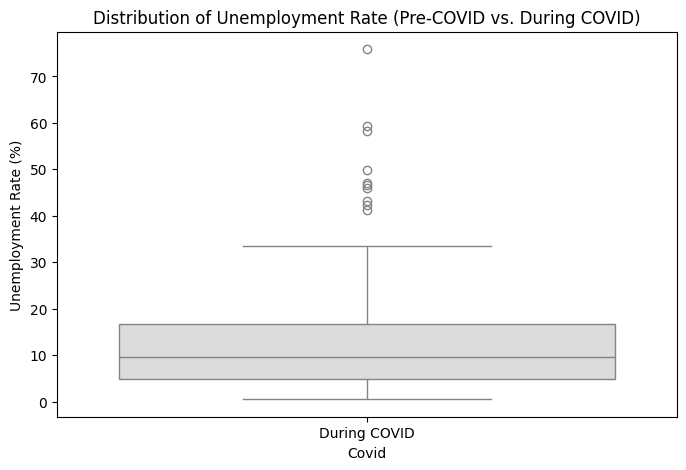

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Covid', y='Unemployment_Rate', palette='coolwarm')
plt.title("Distribution of Unemployment Rate (Pre-COVID vs. During COVID)")
plt.ylabel("Unemployment Rate (%)")
plt.show()


<ipython-input-20-e1da0d660407>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Covid'] == 'During COVID'], x='Region', y='Unemployment_Rate', ci=None)


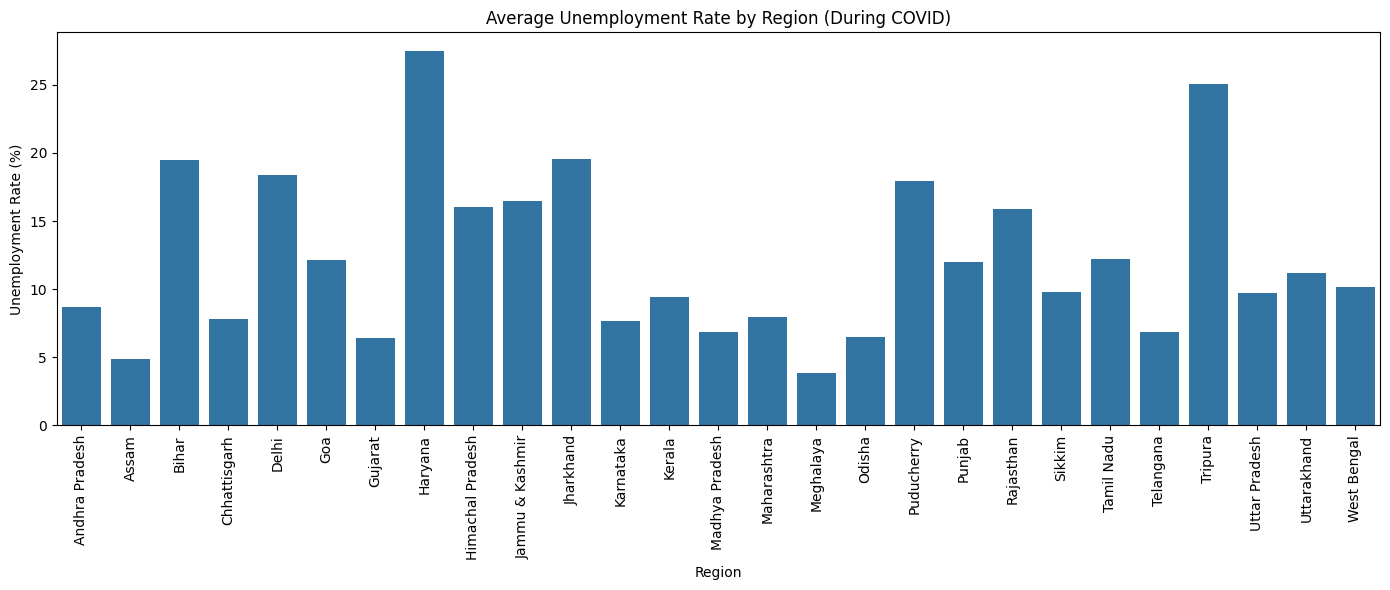

In [20]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df[df['Covid'] == 'During COVID'], x='Region', y='Unemployment_Rate', ci=None)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region (During COVID)")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()


In [21]:
grouped = df.groupby('Covid')['Unemployment_Rate'].describe()
print(grouped[['mean', 'std', 'min', 'max']])


                   mean        std  min    max
Covid                                         
During COVID  12.236929  10.803283  0.5  75.85


In [22]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset (2).csv
Saving Unemployment in India.csv to Unemployment in India (2).csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (3).csv


In [23]:
df.columns



Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude',
       'Year', 'Month', 'Month_Name', 'Covid'],
      dtype='object')

In [24]:

df.columns = df.columns.str.strip()


df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)


In [25]:
print(df.columns.tolist())


['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude', 'Year', 'Month', 'Month_Name', 'Covid']


In [26]:

df.columns = df.columns.str.strip()


print("Cleaned column names:", df.columns.tolist())

df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)


Cleaned column names: ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude', 'Year', 'Month', 'Month_Name', 'Covid']


In [27]:
print(df.head())


           Region       Date Frequency  Unemployment_Rate  Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48  16635535   
1  Andhra Pradesh 2020-02-29         M               5.83  16545652   
2  Andhra Pradesh 2020-03-31         M               5.79  15881197   
3  Andhra Pradesh 2020-04-30         M              20.51  11336911   
4  Andhra Pradesh 2020-05-31         M              17.43  12988845   

   Labour_Participation_Rate Region.1  longitude  latitude  Year  Month  \
0                      41.02    South    15.9129     79.74  2020      1   
1                      40.90    South    15.9129     79.74  2020      2   
2                      39.18    South    15.9129     79.74  2020      3   
3                      33.10    South    15.9129     79.74  2020      4   
4                      36.46    South    15.9129     79.74  2020      5   

  Month_Name         Covid  
0    January  During COVID  
1   February  During COVID  
2      March  During COVID  
3     

🧹 Cleaned Columns:
 ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


<ipython-input-28-6f0d3956cba7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month_Name', y='Unemployment_Rate', order=month_order, palette='Set3')
<ipython-input-28-6f0d3956cba7>:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


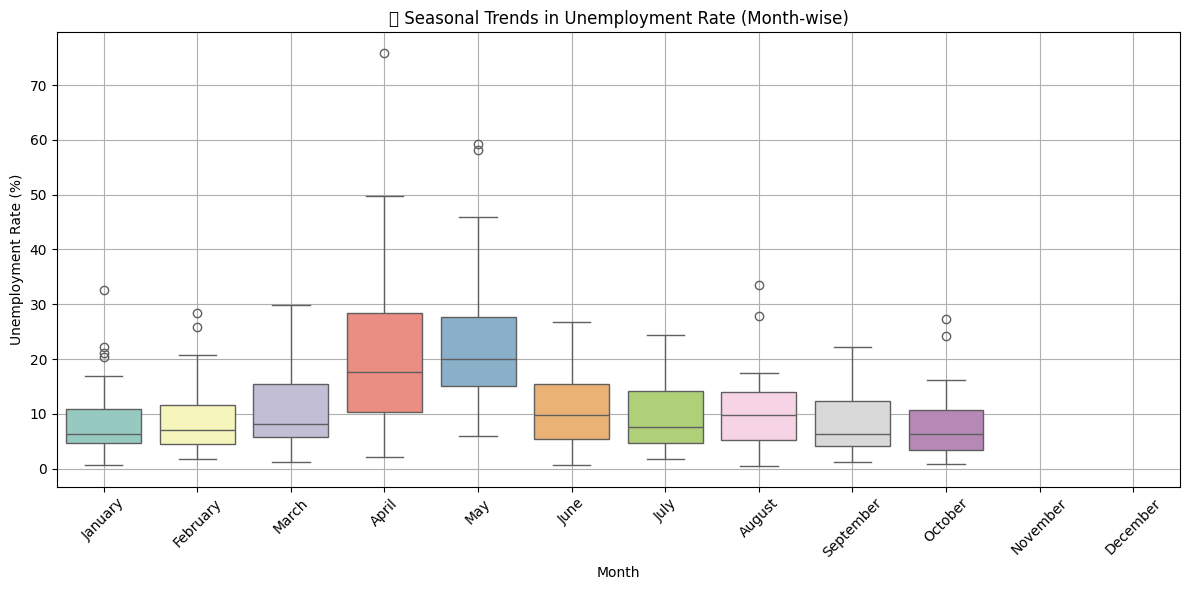

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

df.columns = df.columns.str.strip()
print("🧹 Cleaned Columns:\n", df.columns.tolist())


df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


df.dropna(subset=['Date'], inplace=True)


df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month_Name', y='Unemployment_Rate', order=month_order, palette='Set3')
plt.title("📊 Seasonal Trends in Unemployment Rate (Month-wise)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd


df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df.columns = df.columns.str.strip()


df.rename(columns={
    'Region': 'State',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    ' Estimated Employed': 'Employed',
    ' Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'District'
}, inplace=True)


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

df.head()


,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),District,longitude,latitude,Month,Year,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,2020,January
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2020,February
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,2020,March
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,2020,April
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,2020,May


In [30]:
print(df.columns)


Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'District', 'longitude', 'latitude', 'Month', 'Year', 'Month_Name'],
      dtype='object')


In [31]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")


In [32]:
print(df.columns.tolist())


['State', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_%', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_%', 'District', 'longitude', 'latitude', 'Month', 'Year', 'Month_Name']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


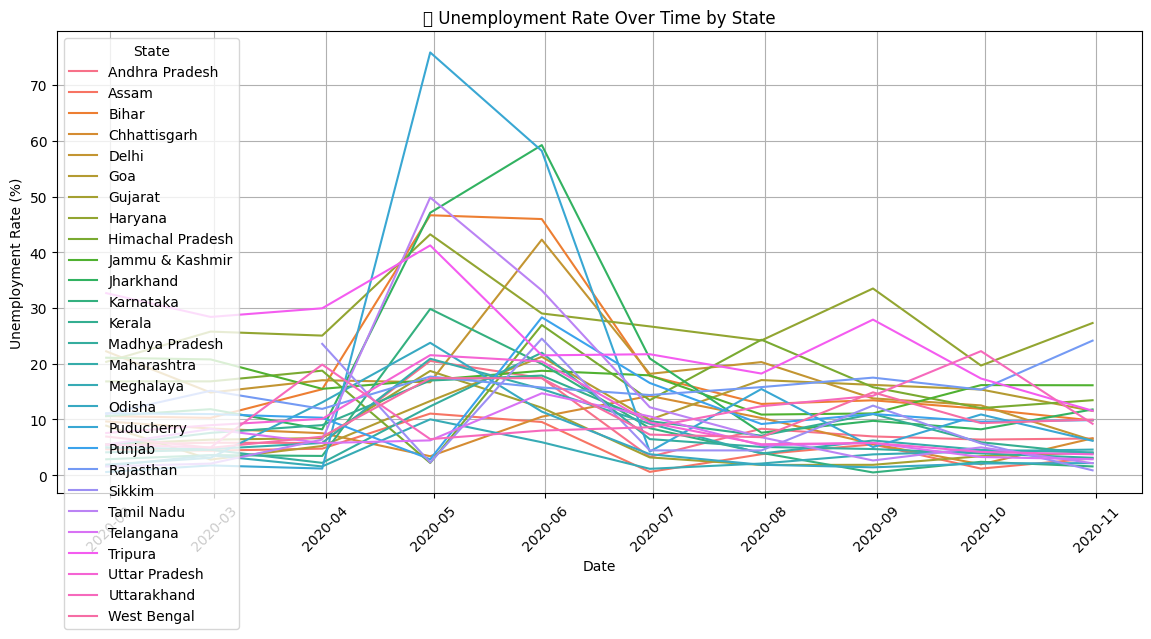

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.rename(columns={'Estimated_Unemployment_Rate_%': 'Unemployment_Rate'})

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='State')
plt.title('📊 Unemployment Rate Over Time by State')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
